In [1]:
# BEFORE RUNNING OPEN NEW BASH WINDOW AND NAVIGATE TO WHERE CORENLP FILES ARE THEN RUN THIS CODE TO SE 

# java -mx1g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9010 -timeout 15000
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import sent_tokenize, word_tokenize 

import spacy
from spacy.attrs import ORTH
import textacy
import pickle
from collections import defaultdict

C:\Users\Beau\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\Beau\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)
C:\Users\Beau\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\Beau\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [2]:
raw_data = pd.read_excel("long_answer/training_set_rel3.xls")

In [3]:
nlp=spacy.load('en_core_web_lg',disable=['ner'])

In [4]:
raw_data['doc'] = raw_data.essay.apply(lambda essay: nlp(essay.lower()))

In [6]:
# file_Name = "engineered_data"
# fileObject = open(file_Name,'w')
# dataObject = raw_data.doc
# pickle.dump(dataObject,fileObject)  
# fileObject.close()


KeyboardInterrupt



In [ ]:
# fileObject = open(file_Name,'r')
# pickle.load(fileObject)  

In [ ]:
# np.save("np_egineered_data", raw_data)

In [81]:
def tree_height(root):
    """
    Find the maximum depth (height) of the dependency parse of a spacy sentence by starting with its root
    Code adapted from https://stackoverflow.com/questions/35920826/how-to-find-height-for-non-binary-tree
    :param root: spacy.tokens.token.Token
    :return: int, maximum height of sentence's dependency parse tree
    """
    if not list(root.children):
        return 1
    else:
        return 1 + max(tree_height(x) for x in root.children)
    
def get_average_heights(paragraph):
    """
    Computes average height of parse trees for each sentence in paragraph.
    :param paragraph: spacy doc object or str
    :return: float
    """
    if type(paragraph) == str:
        doc = nlp(paragraph)
    else:
        doc = paragraph
    roots = [sent.root for sent in doc.sents]
    return np.mean([tree_height(root) for root in roots])

def get_variance_heights(paragraph):
    """
    Computes average height of parse trees for each sentence in paragraph.
    :param paragraph: spacy doc object or str
    :return: float
    """
    if type(paragraph) == str:
        doc = nlp(paragraph)
    else:
        doc = paragraph
    roots = [sent.root for sent in doc.sents]
    return np.std([tree_height(root) for root in roots])

def get_tree_heights(paragraph):
    """
    Computes average height of parse trees for each sentence in paragraph.
    :param paragraph: spacy doc object or str
    :return: float
    """
    if type(paragraph) == str:
        doc = nlp(paragraph)
    else:
        doc = paragraph
    roots = [sent.root for sent in doc.sents]
    return [tree_height(root) for root in roots]

def get_sentences(doc):
    sents = list(doc.sents)
    return sents

def get_sentence_lengths(sentences):
    return len(sentences)

def get_word_counts(doc):
    return doc.count_by(ORTH)

def get_connectives(doc):
    text = doc.text.lower()
    connectives = [
    'after',
    'earlier',
    'before',
    'during',
    'while',
    'later',
    'because',
    'consequently',
    'thus',
    'both',
    'additionally',
    'furthermore',
    'moreover',
    'actually',
    'as a result',
    'due to',
    'but',
    'yet',
    'however',
    'although',
    'nevertheless'
    ]
    total = 0
    for connector in connectives:
        total += text.count(connector)
    return(total/len(doc))

def get_pos(doc):
    return [token.pos_ for token in doc]


def get_posngrams(poslist,n):
    posngrams = []
    for item in range(len(poslist) - n + 1):
        posngrams.append(tuple([poslist[item+i] for i in range(n)]))
    return(posngrams)

def get_posgrams_counts(list_grams):
    posgrams_counts = defaultdict(int)
    for gram in list_grams:
        posgrams_counts[gram] += 1
    return posgrams_counts

def get_TF(list_dicts):
    TF_dict = defaultdict(int)
    for dictionary in list_dicts:
        for gram in dictionary:
            TF_dict[gram] += dictionary[gram]
    return TF_dict

def get_mean_tfTF(posgram_counts,TF):
    tfTF_ratios = list()
    for key, value in posgram_counts.items():
        tfTF_ratios.append(value/TF[key])
    return np.mean(tfTF_ratios)

def get_posngram_ratio(posngrams):
    if len(posngrams) > 0:
        return len(set(posngrams))/len(posngrams)
    else:
        return 0

    
# def get_reading_scores(text):
#     score_names = ['Flesch_Reading_Ease',
#                    'Flesch_Kincaid_Grade_Level',
#                    'Coleman_Liau_Index',
#                    'Gunning_Fog_Index',
#                    'SMOG_Index',
#                    'ARI_Index',
#                    'LIX_Index',
#                    'Dale_Chall_Score',
#                    'Dale_Chall_Known_Faction']
#     score_dictionary = {}
#     scores = readcalc.ReadCalc(text, preprocesshtml=None).get_all_metrics()[11:]
#     for score, score_name in zip(scores, score_names):
#         d[score_name] = score
#     return score_dictionary

def get_reading_scores(doc):
    scores = textacy.TextStats(doc).readability_stats
    del scores['smog_index']
    return scores

def get_word_lengths(doc):
    lengths = list()
    for word in doc:
        if word.is_alpha:
            lengths.append(len(word))
    return lengths

def get_words_of_length(lengths, n, p):
    count = 0
    for length in lengths:
        if length > n and length < p:
            count += 1
    return count

def get_type_token_ratio(doc):
    unique_words = set(word for word in doc if word.is_alpha)
    total_words = [word for word in doc if word.is_alpha]
    return len(unique_words)/len(total_words)

def get_similarity_scores(doc):
    sents = [sent for sent in doc.sents]
    similarity_scores = list()
    for i in range(1,len(sents)):
        sent1 = sents[i-1]
        sent2 = sents[i]
        similarity_scores.append(sent1.similarity(sent2))
    return np.mean(similarity_scores)

def nth_root(x,n):
    return x ** (1/float(n))

def get_yules_k(word_counts):
    m1 =  sum(word_counts.values())
    m2 = sum([freq ** 2 for freq in word_counts.values()])
    if m1 == m2:
        k = 0 
    else:
        i = (m1*m1) / (m2-m1)
        k = 1/i * 10000
        return k

In [53]:
#raw_data['word_tokens'] = raw_data.essay.apply(lambda essay: word_tokenize(essay))
#raw_data['sentence_tokens'] = raw_data.essay.apply(lambda essay: sent_tokenize(essay))

In [82]:
a = raw_data.doc[0]

In [83]:
get_yules_k(get_word_counts(a))

104.72680660150618

In [47]:
# Preengineering
#raw_data['sentences'] = raw_data.doc.apply(get_sentences)
raw_data['word_counts'] = raw_data.doc.apply(get_word_counts)
#raw_data['word_lengths'] = raw_data.doc.apply(get_word_lengths)
#raw_data['pos'] = raw_data.doc.apply(get_pos)
#raw_data['pos_trigrams'] = raw_data.pos.apply(lambda pos: get_posngrams(pos, n=3))
#raw_data['pos_4grams'] = raw_data.pos.apply(lambda pos: get_posngrams(pos, n=4))
#raw_data['pos_trigram_counts'] = raw_data.pos_trigrams.apply(get_posgrams_counts)
#pos_TF = get_TF(raw_data.pos_trigram_counts)
#raw_data['tree_heights'] = raw_data.doc.apply(lambda doc: get_tree_heights(doc))

In [84]:
# Lexical Features
# raw_data['words_length_4'] = raw_data.word_lengths.apply(lambda lengths: get_words_of_length(lengths, 4,6))
# raw_data['words_length_6'] = raw_data.word_lengths.apply(lambda lengths: get_words_of_length(lengths, 6,8))
# raw_data['words_length_8'] = raw_data.word_lengths.apply(lambda lengths: get_words_of_length(lengths, 8,10))
# raw_data['words_length_10'] = raw_data.word_lengths.apply(lambda lengths: get_words_of_length(lengths, 10,12))
# raw_data['words_length_12'] = raw_data.word_lengths.apply(lambda lengths: get_words_of_length(lengths, 12,100))
#raw_data['mean_word_length'] = raw_data.word_lengths.apply(np.mean)
#raw_data['variance_word_length'] = raw_data.word_lengths.apply(np.std)
#raw_data['type_token_ratio'] = raw_data.doc.apply(get_type_token_ratio)


# Length Features
#raw_data['essay_length'] = raw_data.doc.apply(len)
#raw_data['num_words'] = raw_data.doc.apply(lambda doc: len([word for word in doc if word.is_alpha]))
# raw_data['num_sentences'] = raw_data.sentences.apply(get_sentence_lengths)
# raw_data['mean_sentence_length'] = raw_data.num_words/raw_data.num_sentences
#raw_data['num_characters'] = raw_data.essay.apply(len)
#raw_data['fourth_root_num_characters'] = raw_data.num_characters.apply(nth_root, n=4)

# # Occurrence Features
# raw_data['num_commas'] = raw_data.essay.apply(lambda essay: essay.count(','))
# raw_data['num_periods'] = raw_data.essay.apply(lambda essay: essay.count('.'))
# raw_data['num_exclaim'] = raw_data.essay.apply(lambda essay: essay.count('!'))
# raw_data['num_question'] = raw_data.essay.apply(lambda essay: essay.count('?'))
# raw_data['num_semicolon'] = raw_data.essay.apply(lambda essay: essay.count(';'))
# raw_data['num_colon'] = raw_data.essay.apply(lambda essay: essay.count(':'))

# # Style Features
# FIX raw_data['vocabulary'] = raw_data.word_tokens.apply(lambda word_tokens: set(word.lower() for word in word_tokens if word.isalpha()))
# raw_data['vocab_size'] = raw_data.word_counts.apply(len)
raw_data['yules_k'] = raw_data.word_counts.apply(get_yules_k)

# # Syntactical Features
# # the number for these lengths comes from Chen and He 2013
# raw_data['sentence_lengths'] = raw_data.sentences.apply(lambda sentences: [len(sent) for sent in sentences])
# raw_data['very_short_sentences'] = raw_data.sentence_lengths.apply(lambda sentence_lengths: sum([length <= 10 for length in sentence_lengths]))
# raw_data['short_sentences'] = raw_data.sentence_lengths.apply(lambda sentence_lengths: sum([length > 10 and length <18 for length in sentence_lengths]))
# raw_data['medium_sentences'] = raw_data.sentence_lengths.apply(lambda sentence_lengths: sum([length > 18 and length <25 for length in sentence_lengths]))
# raw_data['long_sentences'] = raw_data.sentence_lengths.apply(lambda sentence_lengths: sum([length > 25 for length in sentence_lengths]))
# raw_data['variance_sentence_length'] = raw_data.sentence_lengths.apply(lambda sentence_lengths: np.std(sentence_lengths))

#raw_data['max_height'] = raw_data.tree_heights.apply(lambda heights: max(heights))
#raw_data['sum_heights'] = raw_data.tree_heights.apply(sum)
#raw_data['mean_heights'] = raw_data.tree_heights.apply(np.mean)

#raw_data['mean_sentence_similarity'] = raw_data.doc.apply(get_similarity_scores)

# # POS Ngrams
#raw_data['pos_trigram_ratio'] = raw_data.pos_trigrams.apply(get_posngram_ratio)
#raw_data['pos_fourgram_ratio'] = raw_data.pos_4grams.apply(get_posngram_ratio)
#raw_data['mean_trigram_tfTF'] = raw_data.pos_trigram_counts.apply(lambda pos_trigram_counts: get_mean_tfTF(pos_trigram_counts, TF=pos_TF))

# # Cohesion Features
#raw_data['connectives'] = raw_data.doc.apply(get_connectives)

# Readability Features
#raw_data['reading_scores'] = raw_data.doc.apply(get_reading_scores)

In [85]:
d = dict()
for i in range(1,9):
    d[i] = raw_data[raw_data.essay_set==i]

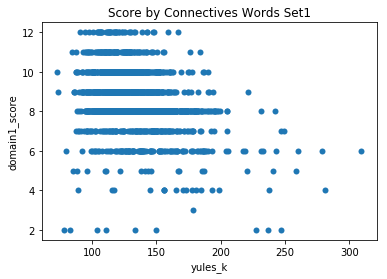

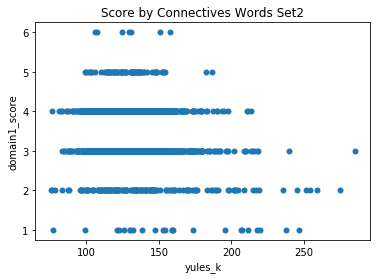

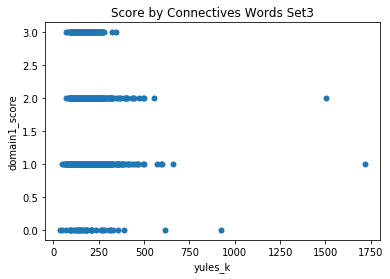

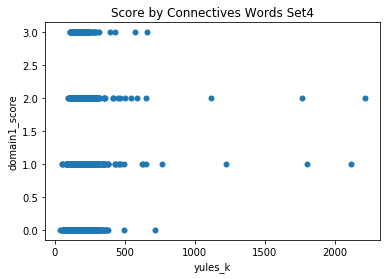

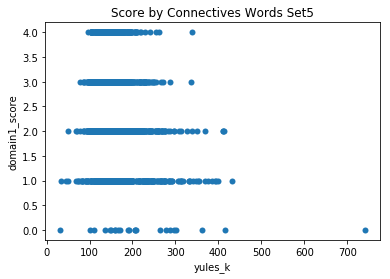

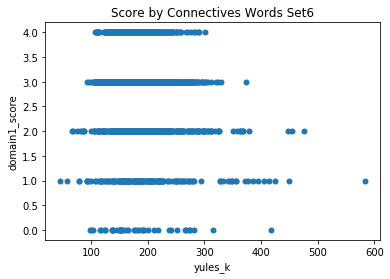

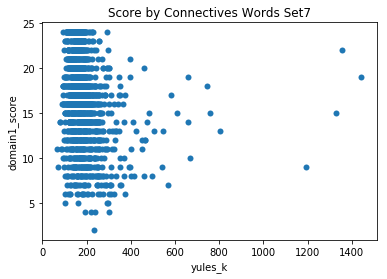

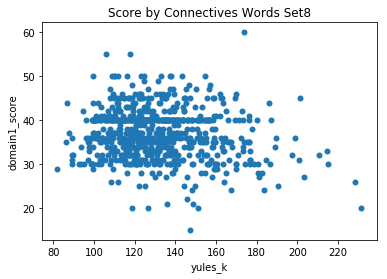

In [87]:
# for i in range(1,9):
#     plt.figure()
#     sns.distplot(d[i].essay_length)
#     plt.title("Distribution of Essay Length Set{}".format(i))

# for i in range(1,9):
#     plt.figure()
#     sns.stripplot(x="words_length_10", y="domain1_score",
#                 sizes=(1, 12), linewidth=0,
#                 data=d[i], jitter=True)
#     plt.title("Score by Number of Sentences Set{}".format(i))

for i in range(1,9):
    plt.figure()
    sns.scatterplot(x="yules_k", y="domain1_score",
                sizes=(1, 8), linewidth=0,
                data=d[i])
    plt.title("Score Words Set{}".format(i))